# Facial Recognition

This uses a dataset available within scikit-learn consisting of a
subset of the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)
data.  Note that this is a relatively large download (~200MB) so it may
take a while to execute.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='data')
lfw_people.data.shape

(1288, 1850)

In [9]:
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 1288
n_features: 1850
n_classes: 7


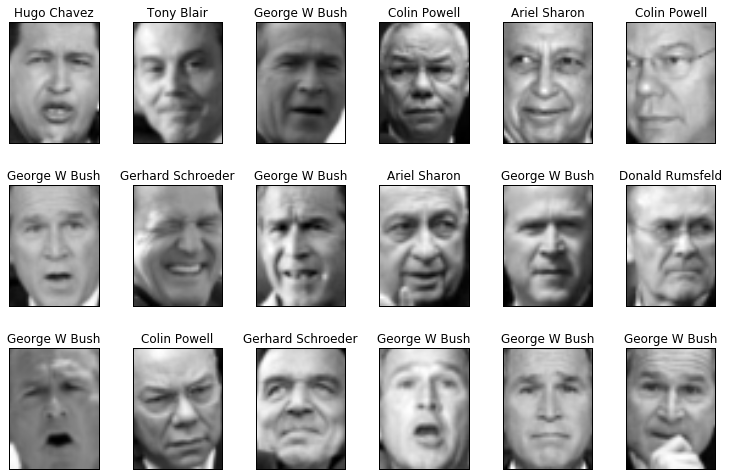

In [10]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names[y], h, w)

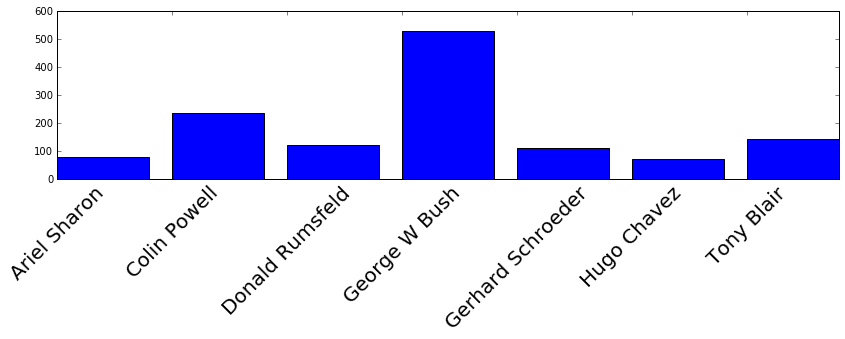

In [12]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(y)
counts = [(y == i).sum() for i in y_unique]

plt.xticks(y_unique,  names[y_unique])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

**Note** : This dataset has already been scaled and localized to a common size. However, in practise this process of bringing every sample to a common base is a very important peice of preprocessing and requires a large amount of training data.

#### Let's perform the usual test-train split for model evaluation

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    lfw_people.data, lfw_people.target, random_state=0)

print(X_train.shape, X_test.shape)

((966, 1850), (322, 1850))


### Unsupervised Feature Extraction with PCA

As we can see from the output above, the number of dimensions is 1850, which is a lot. Hence we will utilize PCA to reduce the number of dimensions while keeping most of the information.

We will utilize RandomizedPCA which performs better on large number of dimensions.

In [14]:
from sklearn import decomposition
pca = decomposition.RandomizedPCA(n_components=150, whiten=True,
                                 random_state=1999)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(966, 150)
(322, 150)


In [15]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)


SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

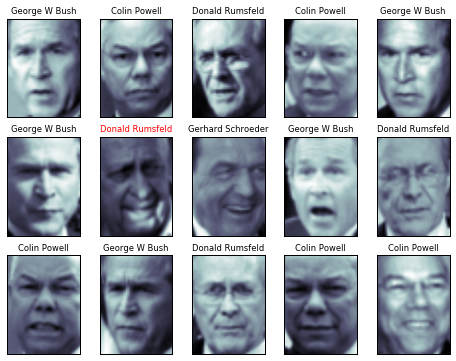

In [16]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape((50, 37)), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i].reshape(1, -1))[0]
    color = 'black' if y_pred == y_test[i] else 'red'
    ax.set_title(lfw_people.target_names[y_pred], fontsize='small', color=color)

In [17]:
print(clf.score(X_test_pca, y_test))

0.782608695652
